In [1]:
import tweepy

consumer_key = 'FkfYnS5rj9J2W7Ri5qhqZIsXn'
consumer_secret = 'BhyKgm97vQRHYVJyG8hBlfeAgJQBnzISYqabXtfdbgfOZmXZRp'
access_token='421390178-e7O1PGG0DIOrCVNv0LWIpbCs6XZ93sgSzzjWNT6a'
access_token_secret ='Ry71JBO5RW3sLpW7TEakKOX8aXFMTOjB8vjJjZzsSN4D2'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [2]:
depressed_tweets = 'depression'
date = '2020-01-20'
tweets = tweepy.Cursor(api.search,
                      q=depressed_tweets,
                      since=date).items()

In [3]:
from textblob import TextBlob
new_list = []
for tweet in tweets:
    print(tweet.text)
    new_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    print('\n')    

@kylegriffin1 Look at that, must be the best hoax ever, one hoax put all of those people out of work. Gotta hand it… https://t.co/qSW6cHbrWW


RT @drboycewatkins1: We just had a record number of jobless claims, over 3 million, which is unprecedented.  Based on what I’m seeing on un…


@matt_odell @prestonjbyrne Something tells me you wouldn't have survived the Great Depression.


RT @xmadisonleeanne: We were expecting the roaring 20’s and we got the Great Depression


@Factsaresafe @That1l1r1 @A_Siegel @stefenenick I do understand correlation. But I also understand the long lasting… https://t.co/nKLurRoXKx


RT @hinakhann_: Attention plzz 🔔🔔
Kindly iss isolation K time mai plzz plzz apni Behen k liye iss Pyari se masoom se bachi Ko follow Kre 
@…


RT @montevercetti: niggas be having depression and watch a show called 'demon slayer'. they not gonna teach you how bro


RT @arissababy_18: some people suffer from depression and domestic abuse, izati


RT @Phislash: #LockdownMeditationDriv

TweepError: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')"))

In [4]:
len(new_list)

2700

In [5]:
new_list[0]

'@kylegriffin1 Look at that, must be the best hoax ever, one hoax put all of those people out of work. Gotta hand it… https://t.co/qSW6cHbrWW'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df= pd.DataFrame(new_list,columns=['Tweets'])

In [9]:
df.head()

,Tweets
0,"@kylegriffin1 Look at that, must be the best h..."
1,RT @drboycewatkins1: We just had a record numb...
2,@matt_odell @prestonjbyrne Something tells me ...
3,RT @xmadisonleeanne: We were expecting the roa...
4,@Factsaresafe @That1l1r1 @A_Siegel @stefenenic...


In [ ]:
dfc = df.copy()

In [11]:
import re
def cleantxt(text):
    text = re.sub(r'@[A-za-z0-9]+','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    
    return text

In [23]:
df = dfc.copy()
df['Tweets'] = df['Tweets'].apply(cleantxt)

In [24]:
df.head()

,Tweets
0,"Look at that, must be the best hoax ever, one..."
1,: We just had a record number of jobless claim...
2,Something tells me you wouldn't have survive...
3,: We were expecting the roaring 20’s and we go...
4,I do understand correlation. But I also un...


In [25]:
def get_subjev(text):
    return TextBlob(text).sentiment.subjectivity

def get_polar(text):
    return TextBlob(text).sentiment.polarity

In [26]:
df['Subjectivity']= df['Tweets'].apply(get_subjev)
df['Polarity']=df['Tweets'].apply(get_polar)

In [27]:
df.head()

,Tweets,Subjectivity,Polarity
0,"Look at that, must be the best hoax ever, one...",0.30,1.00
1,: We just had a record number of jobless claim...,0.90,0.60
2,Something tells me you wouldn't have survive...,0.75,0.80
3,: We were expecting the roaring 20’s and we go...,0.75,0.80
4,I do understand correlation. But I also un...,0.40,-0.05


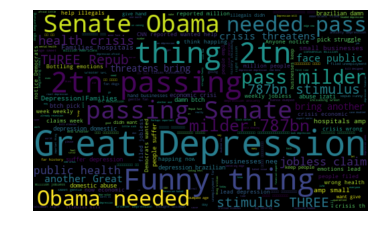

In [28]:
all_words = ''.join([twts for twts in df['Tweets']])
word_cloud = WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(all_words)

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
def analyze(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [31]:
#apply to polarity column
df['Analysis']=df['Polarity'].apply(analyze)
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,"Look at that, must be the best hoax ever, one...",0.30,1.00,Positive
1,: We just had a record number of jobless claim...,0.90,0.60,Positive
2,Something tells me you wouldn't have survive...,0.75,0.80,Positive
3,: We were expecting the roaring 20’s and we go...,0.75,0.80,Positive
4,I do understand correlation. But I also un...,0.40,-0.05,Negative


In [34]:
#sort df based on level of polarity 
sorted_df = df.sort_values(by=['Polarity'],ascending=False)
sorted_df.head()

,Tweets,Subjectivity,Polarity,Analysis
2193,: 3.2 million Americans file for unemployment....,1.0,-1.00,Negative
1083,: 3.2 million Americans file for unemployment....,1.0,-1.00,Negative
366,The COVID contraction is not and will not be ...,1.0,-1.00,Negative
2186,: 3.2 million Americans file for unemployment....,1.0,-1.00,Negative
2636,: Shocking. Horrifying.\n\nBut we predicted th...,1.0,-0.95,Negative


In [38]:
negative_sentiment = df[df['Analysis'] == 'Negative']
negative_sentiment.head()

,Tweets,Subjectivity,Polarity,Analysis
4,I do understand correlation. But I also un...,0.400000,-0.050000,Negative
8,: #LockdownMeditationDrive begins at 21:00 ton...,0.500000,-0.187500,Negative
10,: NUTS? OR...highly CALCULATED? DEMs/#DeepSta...,0.500000,-0.375000,Negative
20,This corona virus is giving me anxiety and dep...,0.550000,-0.116667,Negative
25,: S.Korea flattened its curve &amp; had a 0.7...,0.288889,-0.155556,Negative
